In [49]:
#BK
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from finta import TA


In [51]:
stock = 'KCHOL.IS'
df = yf.download(stock, '2024-01-01', '2025-07-29')

df.head()

/var/folders/m8/s3rdp9n15r9bb8y_d_z_52540000gn/T/ipykernel_15533/2444276356.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, '2024-01-01', '2025-07-29')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,KCHOL.IS,KCHOL.IS,KCHOL.IS,KCHOL.IS,KCHOL.IS
Date,,,,,
2024-01-02,131.471710,131.839729,129.263653,130.919703,13934022
2024-01-03,127.607597,131.563712,127.423595,131.563712,10837888
2024-01-04,130.551682,130.551682,127.515607,127.607601,9338045
2024-01-05,130.735703,131.103707,129.171647,130.735703,6402993
2024-01-08,133.679779,134.783807,131.103703,131.103703,16354050


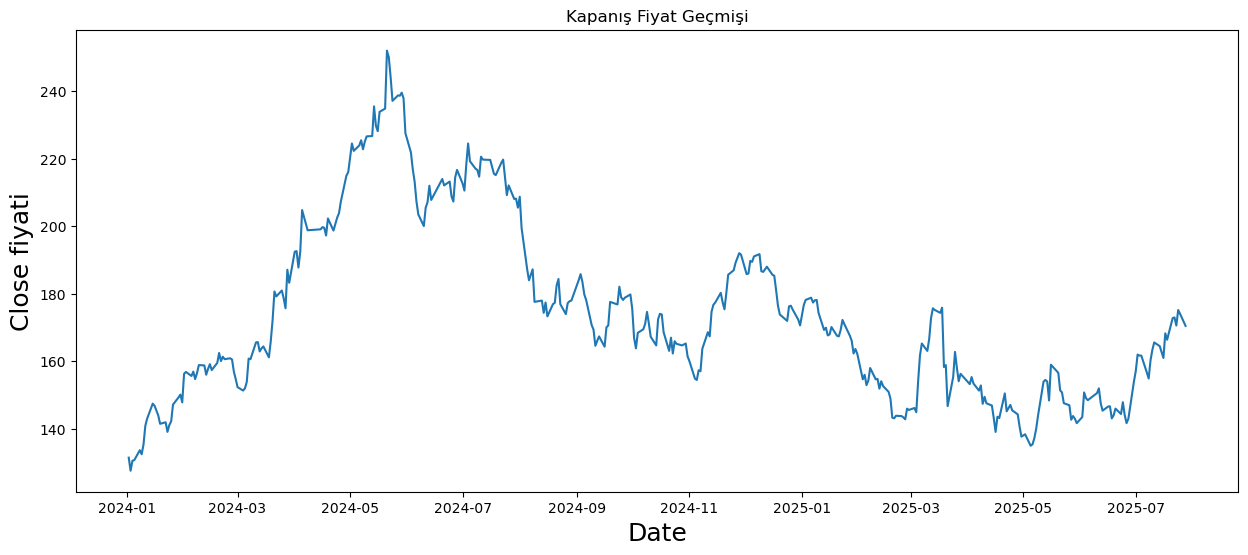

In [53]:
plt.figure(figsize=(15,6))
plt.title('Kapanış Fiyat Geçmişi')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close fiyati', fontsize=18)
plt.show()

In [55]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,KCHOL.IS,KCHOL.IS,KCHOL.IS,KCHOL.IS,KCHOL.IS
count,389.000000,389.000000,389.000000,389.000000,3.890000e+02
mean,173.307639,176.329547,170.942692,173.639917,2.115244e+07
std,26.055810,26.639749,25.701485,26.244553,1.109956e+07
min,127.607597,130.551682,127.423595,127.607601,4.545195e+06
25%,154.107880,156.783034,152.005977,154.203424,1.330691e+07
50%,168.300003,170.445416,165.954990,168.199997,1.762446e+07
75%,185.827545,189.362573,184.107810,186.305248,2.507965e+07
max,251.989792,258.677684,246.257333,251.989803,7.175742e+07


In [57]:
print(df.columns)

MultiIndex([( 'Close', 'KCHOL.IS'),
            (  'High', 'KCHOL.IS'),
            (   'Low', 'KCHOL.IS'),
            (  'Open', 'KCHOL.IS'),
            ('Volume', 'KCHOL.IS')],
           names=['Price', 'Ticker'])


In [59]:
df.columns = ['_'.join(col).lower() for col in df.columns]


In [61]:
df.columns = [col.split('_')[0] for col in df.columns]

In [63]:
df

,close,high,low,open,volume
Date,,,,,
2024-01-02,131.471710,131.839729,129.263653,130.919703,13934022
2024-01-03,127.607597,131.563712,127.423595,131.563712,10837888
2024-01-04,130.551682,130.551682,127.515607,127.607601,9338045
2024-01-05,130.735703,131.103707,129.171647,130.735703,6402993
2024-01-08,133.679779,134.783807,131.103703,131.103703,16354050
...,...,...,...,...,...
2025-07-22,173.000000,175.600006,170.199997,173.199997,30430979
2025-07-23,170.600006,173.800003,170.399994,173.399994,21556719
2025-07-24,175.199997,176.399994,170.500000,171.399994,43401331


In [65]:
df.to_csv("KCHOL.csv", index=True)


In [67]:
df = pd.read_csv("../KCHOL.csv", index_col="Date", parse_dates=True)


In [69]:
df

,close,high,low,open,volume
Date,,,,,
2024-01-02,131.471710,131.839729,129.263653,130.919703,13934022
2024-01-03,127.607597,131.563712,127.423595,131.563712,10837888
2024-01-04,130.551682,130.551682,127.515607,127.607601,9338045
2024-01-05,130.735703,131.103707,129.171647,130.735703,6402993
2024-01-08,133.679779,134.783807,131.103703,131.103703,16354050
...,...,...,...,...,...
2025-07-22,173.000000,175.600006,170.199997,173.199997,30430979
2025-07-23,170.600006,173.800003,170.399994,173.399994,21556719
2025-07-24,175.199997,176.399994,170.500000,171.399994,43401331


In [71]:
df['SMA200'] = TA.SMA(df, 200) #yeni feature larımız
df['RSI'] = TA.RSI(df)
df['ATR'] = TA.ATR(df)
df['BBWidth'] = TA.BBWIDTH(df)
df['Williams'] = TA.WILLIAMS(df)

df = df.iloc[200:, :]


In [73]:
df.head()

,close,high,low,open,volume,SMA200,RSI,ATR,BBWidth,Williams
Date,,,,,,,,,,
2024-10-23,162.324417,166.910395,161.177926,166.432690,21207602,185.153603,40.186135,5.957670,0.123875,-93.023272
2024-10-24,165.954987,167.101478,163.757537,164.330790,13430353,185.345340,44.574935,5.944023,0.119044,-70.930211
2024-10-25,165.190659,165.763911,162.706597,163.470929,11880762,185.518535,43.845547,5.889427,0.111169,-75.581367
2024-10-28,164.712952,166.146069,164.617419,165.190657,4545195,185.688421,43.367904,5.664222,0.097279,-78.488351
2024-10-30,165.286194,166.432685,163.470918,164.808488,13838824,185.846453,44.154099,5.445842,0.090680,-75.000007


In [75]:
df['target'] = df.close.shift(-1)

df.dropna(inplace=True)
df.head()

/var/folders/m8/s3rdp9n15r9bb8y_d_z_52540000gn/T/ipykernel_15533/1751250828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df.close.shift(-1)
/var/folders/m8/s3rdp9n15r9bb8y_d_z_52540000gn/T/ipykernel_15533/1751250828.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,close,high,low,open,volume,SMA200,RSI,ATR,BBWidth,Williams,target
Date,,,,,,,,,,,
2024-10-23,162.324417,166.910395,161.177926,166.432690,21207602,185.153603,40.186135,5.957670,0.123875,-93.023272,165.954987
2024-10-24,165.954987,167.101478,163.757537,164.330790,13430353,185.345340,44.574935,5.944023,0.119044,-70.930211,165.190659
2024-10-25,165.190659,165.763911,162.706597,163.470929,11880762,185.518535,43.845547,5.889427,0.111169,-75.581367,164.712952
2024-10-28,164.712952,166.146069,164.617419,165.190657,4545195,185.688421,43.367904,5.664222,0.097279,-78.488351,165.286194
2024-10-30,165.286194,166.432685,163.470918,164.808488,13838824,185.846453,44.154099,5.445842,0.090680,-75.000007,161.464554


In [35]:
def train_test_split(data, perc):
    data = data.values
    n = int(len(data) * (1 - perc))
    return data[:n], data[n:]

In [77]:
train, test = train_test_split(df, 0.2)

train

array([[ 1.62324417e+02,  1.66910395e+02,  1.61177926e+02, ...,
         1.23874707e-01, -9.30232722e+01,  1.65954987e+02],
       [ 1.65954987e+02,  1.67101478e+02,  1.63757537e+02, ...,
         1.19044025e-01, -7.09302110e+01,  1.65190659e+02],
       [ 1.65190659e+02,  1.65763911e+02,  1.62706597e+02, ...,
         1.11168887e-01, -7.55813672e+01,  1.64712952e+02],
       ...,
       [ 1.42699997e+02,  1.47899994e+02,  1.42699997e+02, ...,
         2.05001348e-01, -6.92607205e+01,  1.43800003e+02],
       [ 1.43800003e+02,  1.44300003e+02,  1.41699997e+02, ...,
         2.05216541e-01, -6.90082606e+01,  1.43000000e+02],
       [ 1.43000000e+02,  1.46399994e+02,  1.42500000e+02, ...,
         2.03224932e-01, -8.06451726e+01,  1.41699997e+02]])

In [79]:
print(len(df))
print(len(train))
print(len(test))
train[0, :-1]

188
150
38


array([ 1.62324417e+02,  1.66910395e+02,  1.61177926e+02,  1.66432690e+02,
        2.12076020e+07,  1.85153603e+02,  4.01861352e+01,  5.95767021e+00,
        1.23874707e-01, -9.30232722e+01])

In [81]:
X = train[:, :-1]
y = train[:, -1]

y

array([165.95498657, 165.19065857, 164.71295166, 165.28619385,
       161.46455383, 160.03143311, 154.8722229 , 154.49005127,
       157.35627747, 157.06965637, 163.75753784, 168.63014221,
       167.3881073 , 174.74476624, 176.75114441, 177.41992188,
       180.28616333, 177.51547241, 175.41357422, 180.19062805,
       185.63647461, 186.9740448 , 189.17149353, 190.604599  ,
       192.03771973, 191.56001282, 185.82754517, 186.01863098,
       189.74473572, 189.45811462, 191.08230591, 191.75109863,
       186.68740845, 186.49633789, 187.26066589, 188.0249939 ,
       185.63647461, 185.34983826, 181.05049133, 176.46450806,
       173.88490295, 172.45178223, 171.97407532, 176.2734375 ,
       176.46450806, 175.31802368, 172.35623169, 170.63650513,
       176.65559387, 178.18424988, 178.8530426 , 177.41992188,
       178.0887146 , 178.18424988, 174.36260986, 169.29891968,
       169.9677124 , 167.67472839, 167.96134949, 170.15879822,
       167.57917786, 167.3881073 , 169.29891968, 172.26

In [83]:
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth": [3, 6],
    "learning_rate": [0.05],
    "n_estimators": [700, 1000],
    "colsample_bytree": [0.3, 0.7]
}

xgbr = XGBRegressor(seed=20)
mod1 = GridSearchCV(estimator=xgbr,
                    param_grid=params,
                    scoring='neg_mean_squared_error',
                    verbose=1)

mod1.fit(X, y)

print("Best parameters:", mod1.best_params_)
print("Lowest RMSE: ", (-mod1.best_score_)**(1/2.0))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.7 MB/s eta 0:00:00ta 0:00:01
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 700}
Lowest RMSE:  6.046097430435894


In [84]:
from xgboost import XGBRegressor

model = XGBRegressor(objective='reg:squarederror',
                     n_estimators=750,
                     colsample_bytree=0.7,
                     learning_rate=0.05,
                     max_depth=3,
                     gamma=1)

model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=750,
             n_jobs=None, num_parallel_tree=None, ...)

In [85]:
test[0,:]

array([ 1.41699997e+02,  1.44300003e+02,  1.41500000e+02,  1.43000000e+02,
        2.25159960e+07,  1.65074304e+02,  4.28886045e+01,  5.49999891e+00,
        1.97900360e-01, -9.89473845e+01,  1.43500000e+02])

In [86]:
val = np.array(test[0, :-1]).reshape(1, -1)
pred = model.predict(val)

pred

array([140.92905], dtype=float32)

In [87]:
def xgb_predict(train, val):
    train = np.array(train)
    X, y = train[:, :-1], train[:, -1]

    model = XGBRegressor(objective='reg:squarederror',
                         n_estimators=750,
                         colsample_bytree=0.7,
                         learning_rate=0.05,
                         max_depth=3,
                         gamma=5)

    model.fit(X, y)

    val = np.array(val).reshape(1, -1)
    pred = model.predict(val)

    return pred[0]

In [88]:
xgb_predict(train, test[0, :-1])

141.18695

In [89]:
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    mape = np.mean(np.abs((actual - pred) / actual)) * 100
    return mape

In [97]:
from sklearn.metrics import mean_squared_error

def validate(data, perc):
    predictions = []
    train, test = train_test_split(data, perc)
    history = [x for x in train]

    for i in range(len(test)):
        X_test, y_test = test[i, :-1], test[i, -1]
        pred = xgb_predict(history, X_test)
        predictions.append(pred)
        history.append(test[i])

    error = mean_squared_error(test[:, -1], predictions) ** 0.5

    MAPE = mape(test[:, -1], predictions)

    return error, MAPE, test[:, -1], predictions

In [99]:
rmse, MAPE, y, pred = validate(df, 0.2)

In [100]:
print("RMSE: " + f'{rmse}')
print("MAPE: " + f'{MAPE}')
print(y)
print(pred)

RMSE: 4.134868147853086
MAPE: 2.0840294783648075
[143.5        150.80000305 149.1000061  148.5        150.6000061
 152.         147.6000061  145.3999939  146.6000061  146.69999695
 143.1000061  144.         146.         144.3999939  147.8999939
 144.1000061  141.69999695 143.         154.         157.1000061
 162.         161.69999695 161.69999695 156.69999695 154.8999939
 160.30000305 163.3999939  165.6000061  164.5        161.
 168.30000305 166.3999939  172.80000305 173.         170.6000061
 175.19999695 174.1000061  170.5       ]
[141.18695, 145.43181, 148.96498, 150.23409, 148.74411, 150.3479, 151.94215, 150.29979, 147.84369, 148.20073, 147.84564, 144.76031, 147.29428, 146.44478, 145.23424, 148.61734, 146.4226, 144.05959, 143.85173, 156.29411, 154.80861, 161.69348, 160.13832, 160.10118, 155.09538, 155.02733, 155.17851, 161.76147, 167.22604, 164.94736, 159.24864, 169.95036, 165.02928, 172.0939, 172.14832, 171.77483, 172.76729, 172.86382]


In [101]:
pred = np.array(pred)
test_pred = np.c_[test, pred]

In [105]:
df_TP = pd.DataFrame(test_pred, columns=["close", "high", "low", "open", "volume", "SMA200",
                                        "RSI", "ATR", "BBWidth", "Williams", "Target", "Pred"])

Text(0, 0.5, 'Price')

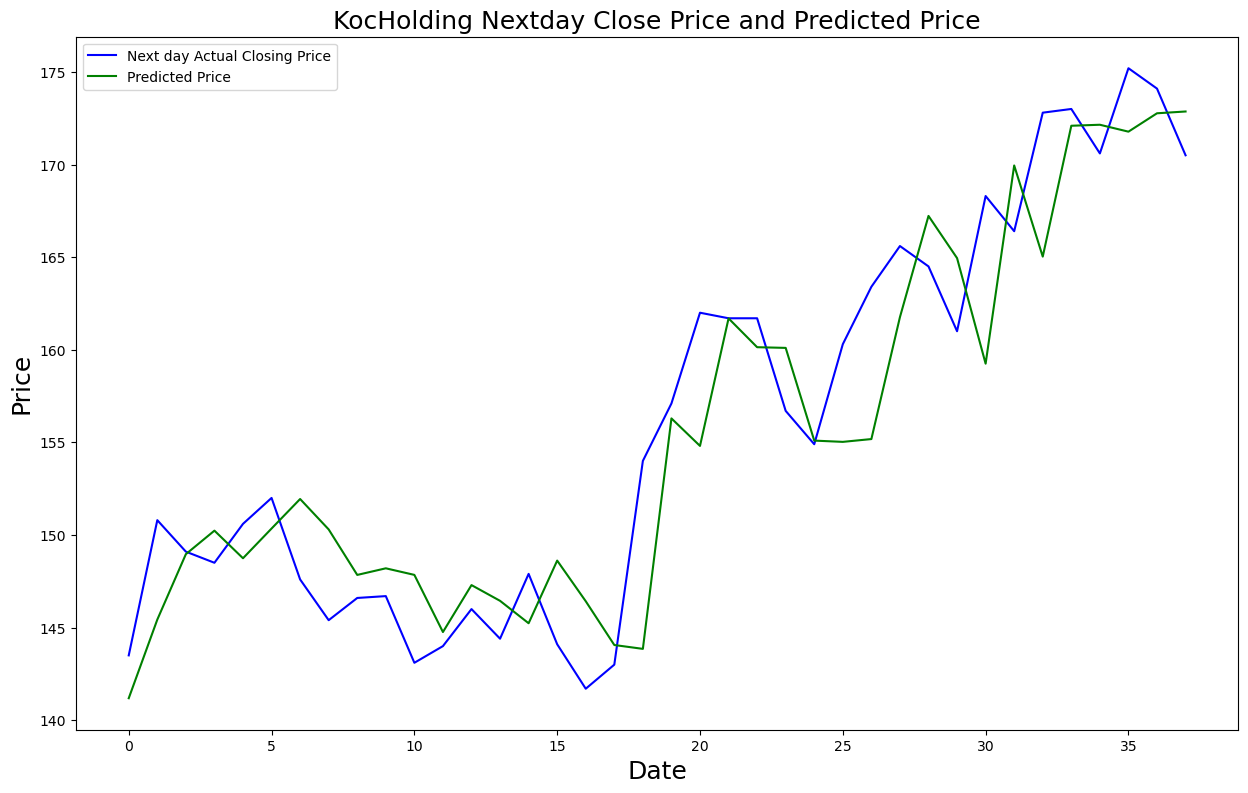

In [107]:
plt.figure(figsize=(15, 9))
plt.title("KocHolding Nextday Close Price and Predicted Price", fontsize=18)

plt.plot(df_TP["Target"], label="Next day Actual Closing Price", color="blue")
plt.plot(df_TP["Pred"], label="Predicted Price", color="green", alpha=1)

plt.xlabel("Date", fontsize=18)
plt.legend(loc="upper left")
plt.ylabel("Price", fontsize=18)

In [109]:
df_TP

,close,high,low,open,volume,SMA200,RSI,ATR,BBWidth,Williams,Target,Pred
0,141.699997,144.300003,141.500000,143.000000,22515996.0,165.074304,42.888604,5.499999,0.197900,-98.947384,143.500000,141.186951
1,143.500000,144.100006,139.699997,141.500000,25753900.0,164.919991,45.484489,5.035713,0.192009,-81.730757,150.800003,145.431808
2,150.800003,151.500000,144.800003,144.800003,30004596.0,164.786891,54.514185,5.307142,0.177768,-46.634594,149.100006,148.964981
3,149.100006,151.199997,147.800003,150.000000,39440211.0,164.665833,52.340000,5.264284,0.160194,-54.807655,148.500000,150.234085
4,148.500000,149.100006,147.800003,149.100006,12481633.0,164.523622,51.558411,4.850000,0.144302,-57.692299,150.600006,148.744110
5,150.600006,151.899994,148.399994,149.600006,45733831.0,164.390000,54.139671,4.307142,0.133711,-47.596118,152.000000,150.347900
6,152.000000,153.100006,150.600006,151.100006,35481031.0,164.237582,55.829474,4.114285,0.130343,-31.666650,147.600006,151.942154
7,147.600006,151.100006,146.199997,150.199997,32909104.0,164.053610,49.638889,4.050000,0.127791,-41.911723,145.399994,150.299789
8,145.399994,145.399994,139.399994,140.000000,29517322.0,163.895899,46.842084,4.335715,0.125317,-56.204419,146.600006,147.843689
9,146.600006,148.800003,143.399994,145.399994,25938835.0,163.758997,48.545075,4.300002,0.121479,-47.445213,146.699997,148.200729


In [111]:
!pip install finta

In [123]:
import pickle
with open("kchol_xgb_model.pkl", "wb") as f:
    pickle.dump(model, f)